**Load the dataset using pandas**

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Codveda DA/1) iris.csv')
df.drop_duplicates(inplace=True) # Changed 'inplaces' to 'inplace'
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
missing_values = df.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [52]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Identify and handle missing values (e.g., imputation or
removal)**

In [38]:
df = df.dropna()

In [39]:
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

In [40]:
df['species'] = df['species'].str.strip().str.lower()

initial_shape, final_shape, df['species'].unique()

((147, 5),
 (147, 5),
 array(['setosa', 'versicolor', 'virginica'], dtype=object))

In [41]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


**Calculate summary statistics (mean, median, mode,
standard deviation)**

In [42]:
numerical_cols = df.select_dtypes(include='number').columns

In [43]:
mean = df[numerical_cols].mean()
median = df[numerical_cols].median()
mode = df[numerical_cols].mode().iloc[0]  # mode bisa punya banyak nilai, ambil yang pertama
std_dev = df[numerical_cols].std()

In [44]:
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Standard Deviation': std_dev
})

print(summary_stats)

                  Mean  Median  Mode  Standard Deviation
sepal_length  5.856463     5.8   5.0            0.829100
sepal_width   3.055782     3.0   3.0            0.437009
petal_length  3.780272     4.4   1.4            1.759111
petal_width   1.208844     1.3   0.2            0.757874


**Visualize data distributions using histograms, boxplots,
and scatter plots**

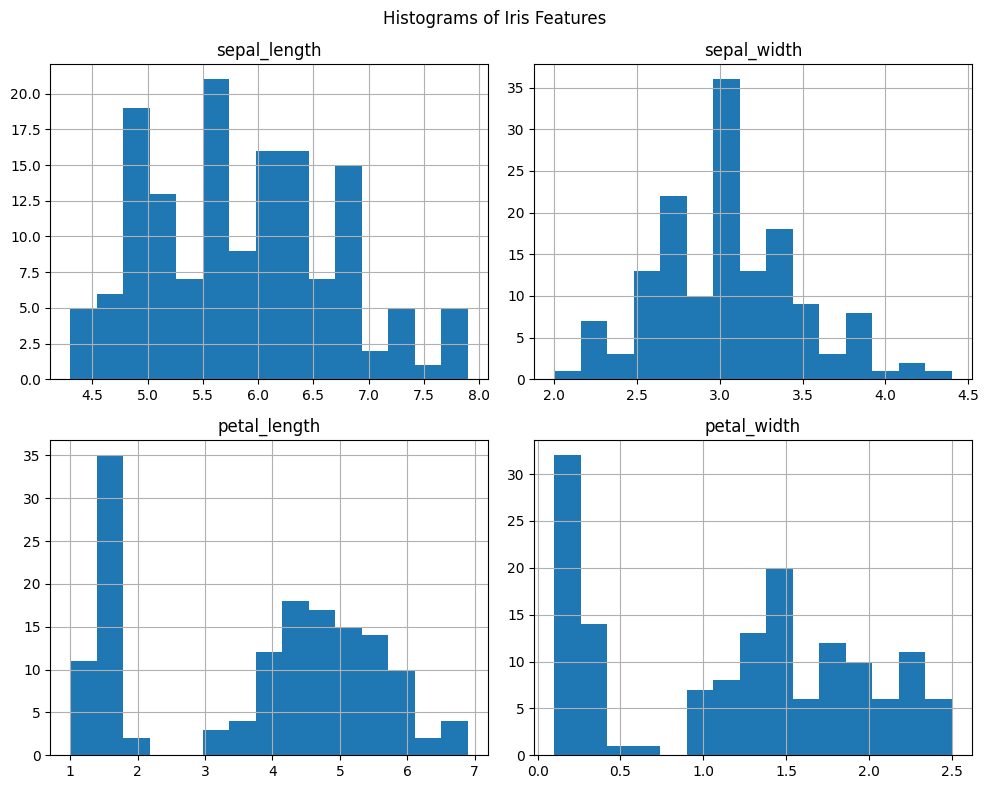

In [45]:
df[numerical_cols].hist(figsize=(10, 8), bins=15)
plt.suptitle("Histograms of Iris Features")
plt.tight_layout()
plt.show()

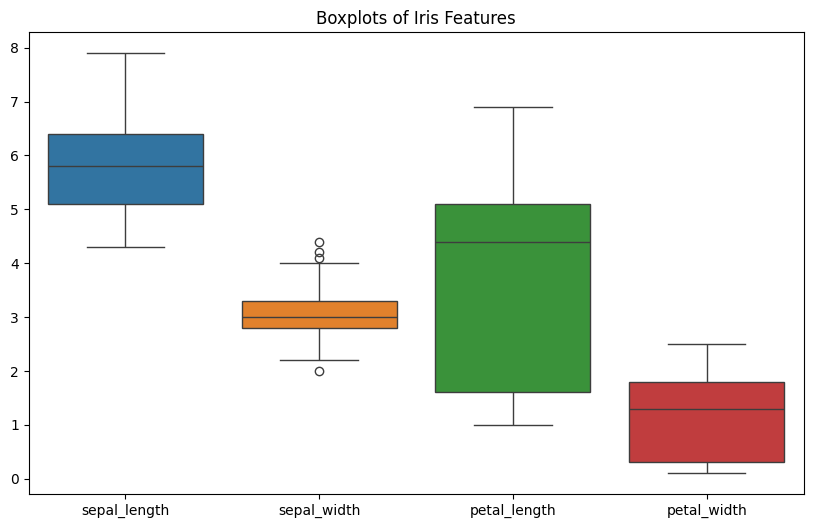

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots of Iris Features")
plt.show()

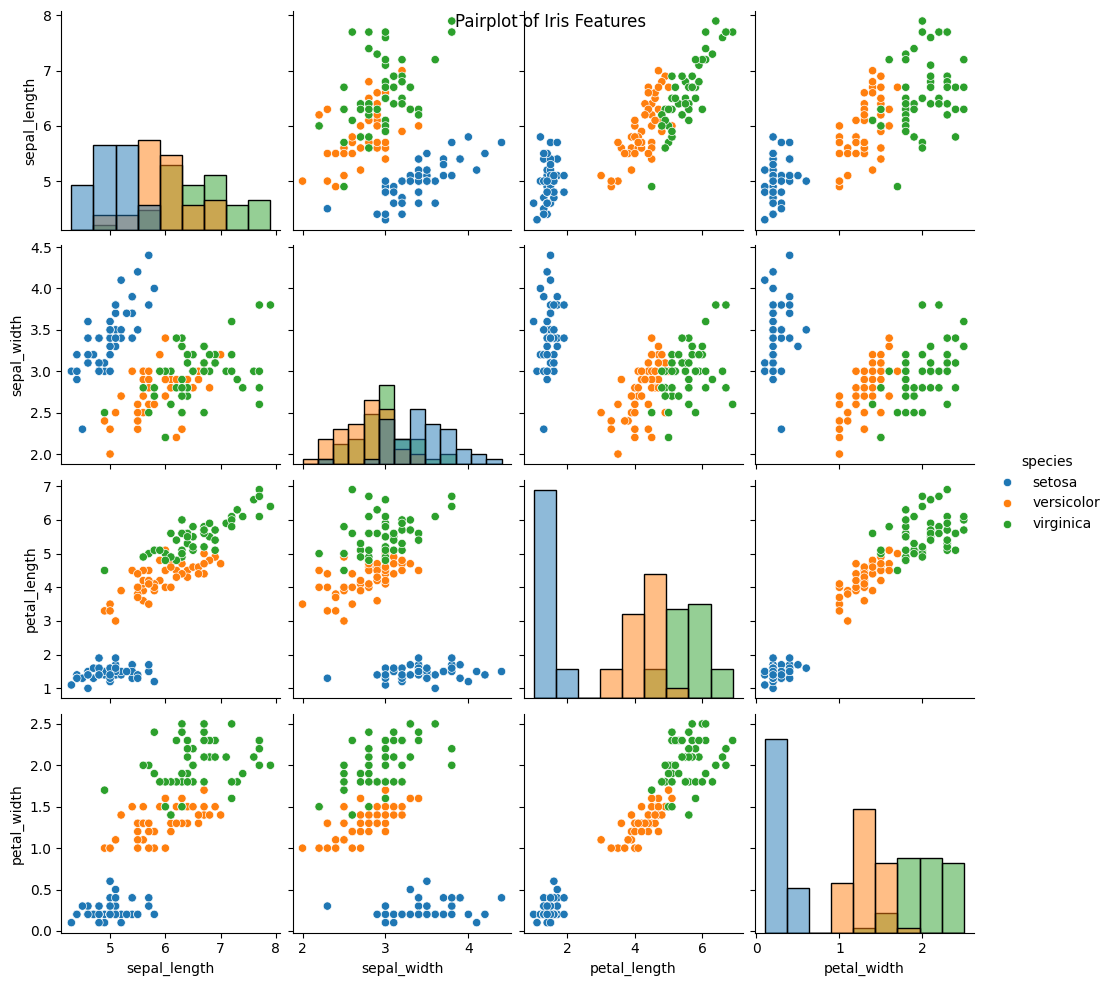

In [47]:
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Pairplot of Iris Features")
plt.show()

**Find correlations between numerical features**

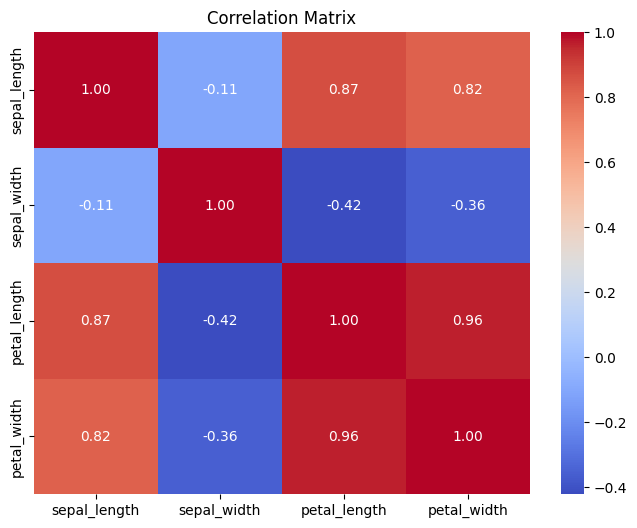

In [48]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Create basic plots and charts to visualize
the distribution and relationships within the dataset**

<Figure size 1000x600 with 0 Axes>

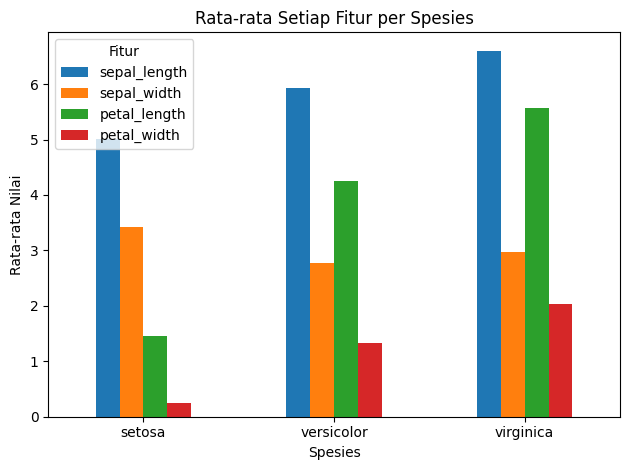

In [49]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby('species')[numerical_cols].mean()
df_grouped.plot(kind='bar')
plt.title("Rata-rata Setiap Fitur per Spesies")
plt.xlabel("Spesies")
plt.ylabel("Rata-rata Nilai")
plt.xticks(rotation=0)
plt.legend(title="Fitur")
plt.tight_layout()
plt.savefig("barplot_avg_features_per_species.png")  # Simpan gambar
plt.show()

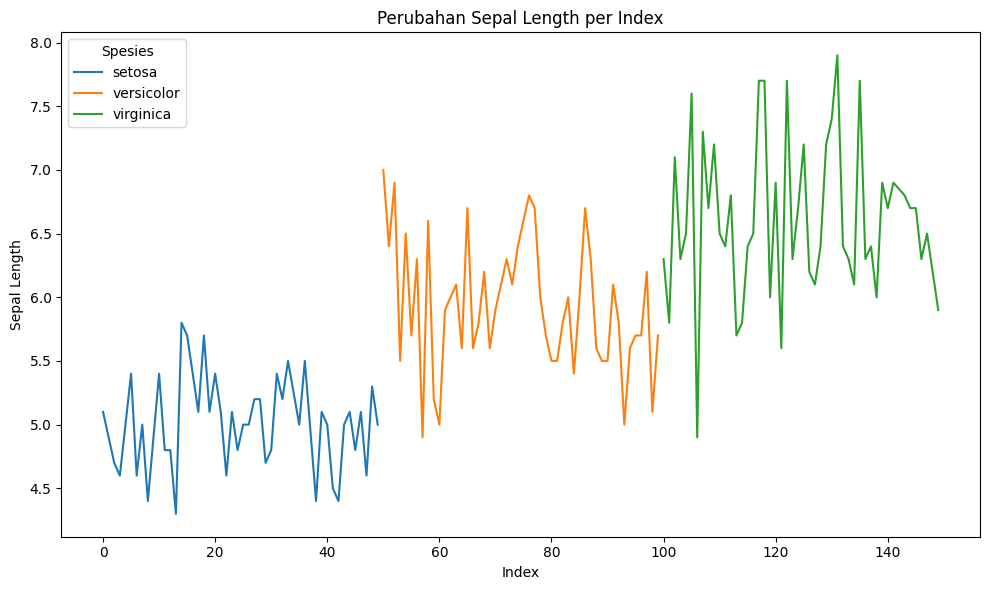

In [50]:
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['sepal_length'], label=species)
plt.title("Perubahan Sepal Length per Index")
plt.xlabel("Index")
plt.ylabel("Sepal Length")
plt.legend(title="Spesies")
plt.tight_layout()
plt.savefig("lineplot_sepal_length.png")  # Simpan gambar
plt.show()

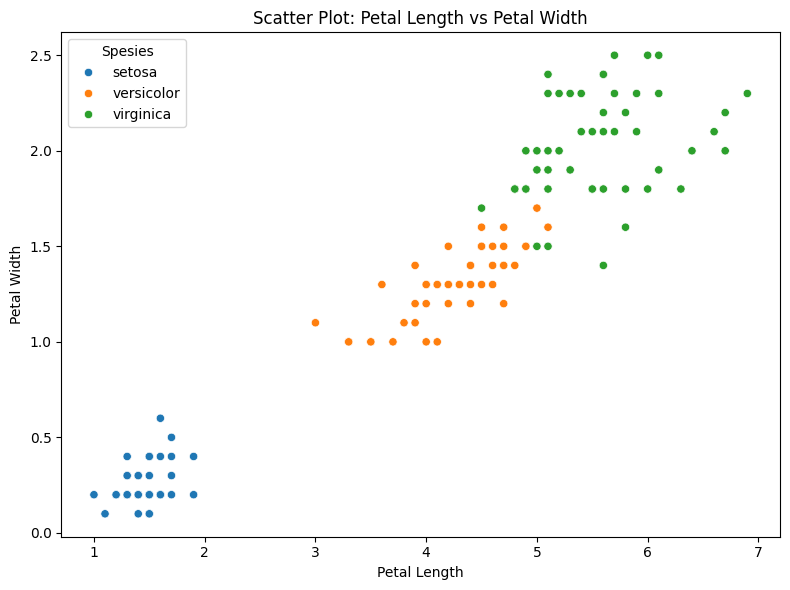

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title("Scatter Plot: Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Spesies")
plt.tight_layout()
plt.savefig("scatter_petal.png")  # Simpan gambar
plt.show()

In [55]:
df.to_csv("/content/drive/MyDrive/Codveda DA/iris_cleaned.csv", index=False)
print("Dataset cleaned and saved as 'iris_cleaned.csv'")

Dataset cleaned and saved as 'iris_cleaned.csv'
